In [1]:
# including the project directory to the notebook level
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter, date2num
import pandas as pd
from json import load as jsonload

plt.rcParams["figure.figsize"]=15,12

In [3]:
RESULTS_FILE = '../temp/results.csv'
FMU_VARS_EXPLANATION = '../resource/RLPPOV1_get_model_variables.json'
alias_dict = {}

df = pd.read_csv(RESULTS_FILE)
with open(FMU_VARS_EXPLANATION, 'r') as f: 
    fmu_var_names = jsonload(f)
f.close()



for col in df.columns:
    try:
        alias_dict[col] = fmu_var_names[col]
    except:
        alias_dict[col] = col

In [4]:
df.columns

Index(['reward_energy', 'reward_comfort', 'action', 'res.PFan', 'res.PHea',
       'res.PCooSen', 'res.PCooLat', 'TSupCor.T', 'TSupEas.T', 'TSupWes.T',
       'TSupNor.T', 'TSupSou.T', 'weaBus.TDryBul', 'weaBus.relHum',
       'weaBus.HGloHor', 'TSup.T'],
      dtype='object')

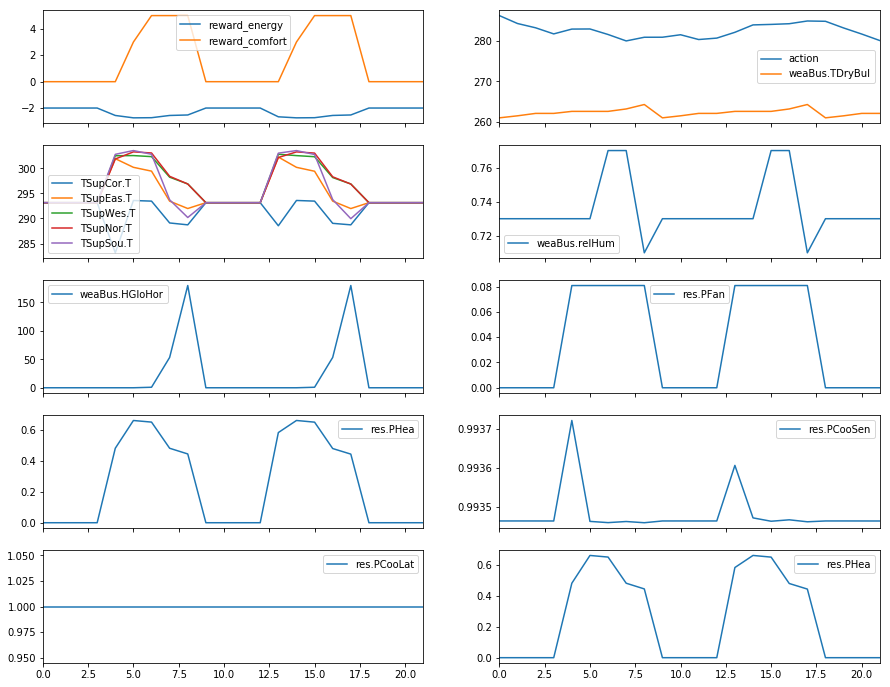

In [5]:
fig, ax = plt.subplots(nrows=5, ncols=2, sharex=True)

df.plot(y=['reward_energy', 'reward_comfort'],ax=ax[0,0])
df.plot(y=['action','weaBus.TDryBul'],ax=ax[0,1])
df.plot(y=['TSupCor.T', 'TSupEas.T', 'TSupWes.T','TSupNor.T', 'TSupSou.T'],ax=ax[1,0])
df.plot(y=['weaBus.relHum'],ax=ax[1,1])
df.plot(y=['weaBus.HGloHor'],ax=ax[2,0])
df.plot(y=['res.PFan'],ax=ax[2,1])
df.plot(y=['res.PHea'],ax=ax[3,0])
df.plot(y=['res.PCooSen'],ax=ax[3,1])
df.plot(y=['res.PCooLat'],ax=ax[4,0])
df.plot(y=['res.PHea'],ax=ax[4,1])

In [10]:
fig.savefig('hello.png',bbox_inches='tight')